<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Linear Regression**

---

Hello data enthusiat,

We will start to learn about linear regression. At the moment, we will use the fuel data consumption per kilometre. The dataset was obtained from this [book](http://buku.dioskurn.com/).

## **What is Linear Regression?**

Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (features).

It models the relationship as a straight line:

𝑦 = 𝛽0 + 𝛽1𝑥 + 𝜀

where:
* y = dependent variable (what we’re trying to predict)
* x = independent variable (the input feature)
* β0 = intercept (value of y when 𝑥 = 0)
* β1 = slope (change in 𝑦 for a unit change in 𝑥)
* 𝜀 = error term (difference between actual and predicted)



## **Goal of Linear Regression**

To find the best-fitting line by minimizing the residual sum of squares (RSS) between actual and predicted values.

## **Why we need to use linear regression?**

* Predicting continous outcomes (e.g., houseprices, sales)
* Identify relationships and trends.
* It's simple, interpretable, and often a good baseline.

In [1]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/bensin.csv'
df = pd.read_csv(url)
df.head()

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


In [3]:
# Data dimension
df.shape

(65, 2)

In [4]:
# Datasummary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Liter      65 non-null     int64  
 1   Kilometer  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
# Renaming columns
df.rename(columns={'Kilometer':'Kilometre'}, inplace=True)
df.head()

,Liter,Kilometre
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


In [6]:
# Statistical descriptive
df.describe()

,Liter,Kilometre
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


In [7]:
# Importing library for machine learning
from sklearn.model_selection import train_test_split
liter = df[['Liter']]
kilometre = df[['Kilometre']]

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(liter, kilometre, test_size=0.2, random_state=0)

In [8]:
# Check
display(X_train.size, X_test.size)

52

13

Now, we want to visualize it.

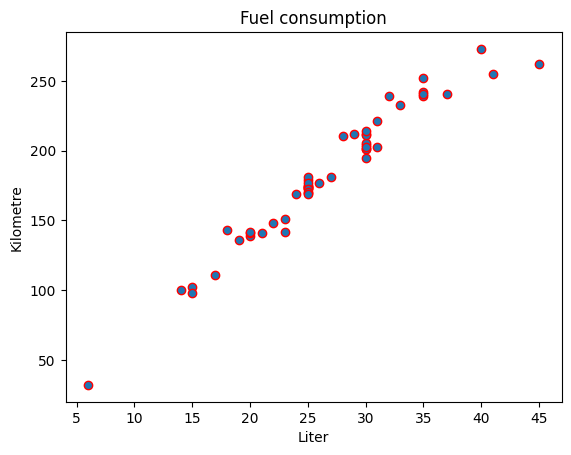

In [12]:
# Visualization # Scatter plot # Training data set
plt.scatter(X_train, y_train, edgecolors='r')
plt.title('Fuel consumption')
plt.xlabel('Liter')
plt.ylabel('Kilometre')
plt.show()

We can see the relationship between fuel in liter and distance in kilometre. In general, both features seem have linear relationship pattern.

Now, we will add regression line.

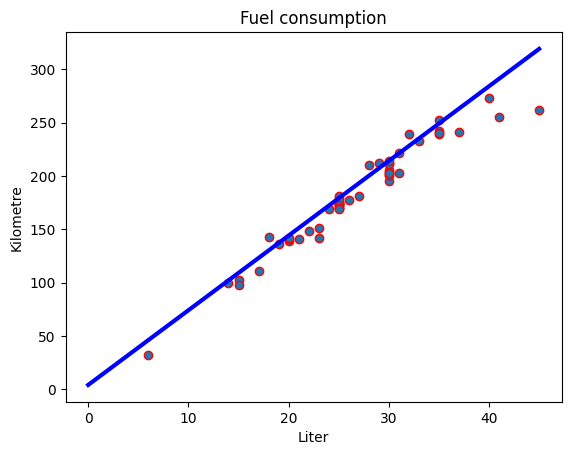

In [14]:
# Adding regression line in scatterplot
plt.scatter(X_train, y_train, edgecolors='r')
plt.title('Fuel consumption')
plt.xlabel('Liter')
plt.ylabel('Kilometre')
x1 = np.linspace(0,45) # start: 0 and stop: 45
y1 = 4 + 7*x1
plt.plot(x1, y1, color='blue', linewidth=3)
plt.show()

After adding regression line, we can see that the line cannot exactly represents all data points. There are some misses data point. We can see some data points can be located below and above the line. It means the prediction line cannot represent 100% data points. This is called as residual. A residual itself is the difference between the actual observed value and the predicted value given by the model. Residual can be used to evaluate model performance. To put it simply, we need to minimize residual to make good model prediction.

## **Model training**

Model training is the process where a machine learning algorithm learns from data to find the best parameters for making predictions. In the case of linear regression, this learning process is performed using Ordinary Least Squares (OLS).

**OLS Concept**

* Ordinary Least Squares (OLS) is a fundamental method used in linear regression to estimate the relationship between independent variable(s) and a dependent variable.
* OLS finds the best-fitting line by minimizing the sum of squared residuals — the differences between observed values and predicted values.

In [15]:
# Importing Linear regression
from sklearn.linear_model import LinearRegression

In [16]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)  # OLS is applied here during training

LinearRegression()

Now, we want to see the coeficient or slope of feature (Liter). we can check it by using code below

In [17]:
# Coeficient
model.coef_

array([[6.45829591]])

The coeficient of X is 6.458

Now, lets check the value of the intercept or constant too

In [18]:
# Intercept or constant
model.intercept_

array([10.64122249])

Now we will plot the equation with the value of coeficient and intercept that we have just found.

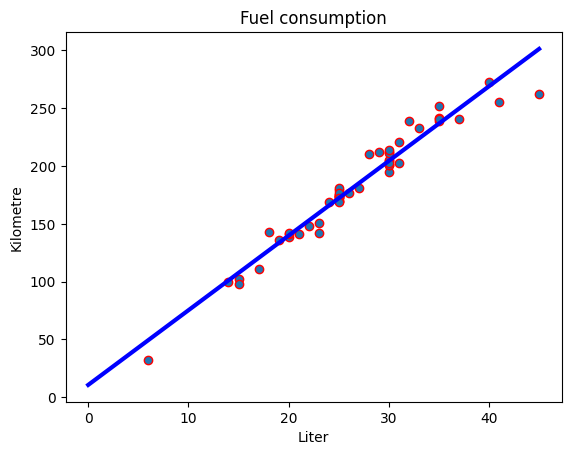

In [19]:
# New scatter plot
plt.scatter(X_train, y_train, edgecolors='r')
plt.title('Fuel consumption')
plt.xlabel('Liter')
plt.ylabel('Kilometre')
x1 = np.linspace(0,45) # start: 0 and stop: 45
y1 = 10.64 + 6.46*x1
plt.plot(x1, y1, color='blue', linewidth=3)
plt.show()

We can see the new regression line is more 'fit' than the previous line.

## **Model Evaluation**

After model development, now we want to evaluate the model using new data (test data). We will use coeficient determination or R-squarred (R^2) as a regression metric to evaluate the model.

In [20]:
# Scoring model
r2 = model.score(X_test, y_test)
print('R-squarred:', r2)

R-squarred: 0.9798523775622333


The model has R-squarred of 0.979. This is a good score as it near from 1.

Now, we will check the model to perform prediction in new dataset. We can use predict() function for the case. As an example, to estimate the distance for 60 litre of fuel, we can make prediction as below

In [21]:
# Prediction
distance_km = model.predict([[60]])
print('Distance in kilometre:', distance_km)

Distance in kilometre: [[398.13897723]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Based on the result, We can see that the consumption of 60 litre fuel can bring us to 398.14 km in distance.

Now, we will predict all of X_test

In [22]:
# Prediction to X_test
prediction = model.predict(X_test)
print(prediction)

[[107.51566118]
 [172.0986203 ]
 [172.0986203 ]
 [159.18202848]
 [139.80714074]
 [268.97305898]
 [204.39009986]
 [236.68157942]
 [ 75.22418162]
 [243.13987534]
 [172.0986203 ]
 [139.80714074]
 [191.47350804]]


Now, we will compare with the actual value from y_test

In [23]:
# Comparison to actual value
print(y_test)

    Kilometre
45      102.0
29      167.0
43      177.0
62      142.0
34      144.0
33      278.0
31      211.0
40      241.0
26       65.0
63      241.0
22      166.2
2       144.0
11      180.0


Based on the line by line comparison, we can see our prediction is relatively similar.